Scikit learn is a machine learning library for python. 
It is built on NumPy, matplotlib, and SciPy

In [49]:
#First, here is the code to install the scikit learn package with conda in the terminal

"""
conda create -n sklearn-env -c conda-forge scikit-learn
conda activate sklearn-env
"""

##Import our important libraries


#Data processing
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


#Machine Learning
from sklearn import datasets



We have 4 feature variables (`petal length (cm)`, `petal width (cm)`, `sepal length(cm)`, `sepal width (cm)`) - these are what we'll use to make our predictions

Our target variable is species. There are three different species: Versicolor, Virginica, and Setosa


Our goal is to use our feature variables, the 4 flower measurements, to predict the target variable, what species the flower is.


We're going to use a KNN Classifier, but lets check out the data first. Note that since it is part of sklearn's built in datasets, its a little different than a pandas dataframe


['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
0                4.9               3.0                1.4               0.2
0                4.7               3.2                1.3               0.2
0                4.6               3.1                1.5               0.2
0                5.0               3.6                1.4               0.2


<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

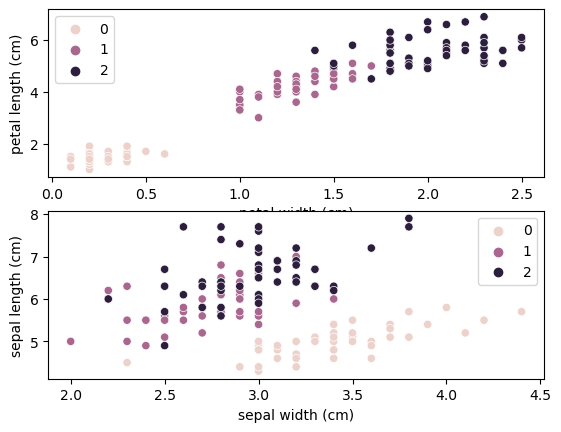

In [50]:
#Explore data 
iris = datasets.load_iris()


#Here are the different species
print(iris['target_names'])

#We can see that our data and target are both stored as numpy arrays
print(type(iris['data'])) 
print(type(iris['target']))

#data and target must have the same number of observations(rows)
print(iris['data'].shape)
print(iris['target'].shape)

#Converting stuff to a dataframe so we can visually explore it
X = iris['data']
y = iris['target']


df = pd.DataFrame(X, y, columns = iris['feature_names'])
print(df.head())

petals = df[['petal length (cm)', 'petal width (cm)']]
sepals = df[['sepal length (cm)', 'sepal width (cm)']]

fig, ax = plt.subplots(2, 1)
sns.scatterplot(ax = ax[0], data = petals, x = 'petal width (cm)', y = 'petal length (cm)', hue = petals.index)
sns.scatterplot(ax = ax[1], data = sepals, x = 'sepal width (cm)', y = 'sepal length (cm)', hue = sepals.index)

In [51]:
#lets try a KNN classifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsTransformer



#instantiate knn classifier object
knn = KNeighborsClassifier(n_neighbors=6)

# Pass 2 arguments to the fit method, features as a np.array and targets as an np.array. 
knn.fit(X, y)

#lets try a prediction
prediction = knn.predict(np.array([[5, 3.4, 1.3, 1], [5.1, 3.3, 1.2, 0.9], [4.6, 3.5, 1.4, 1.2], [7, 3, 5, 2], [5, 4, 6, 2.3]]))


#Using a lookup table to convert the array values to its corresponding species

species_lut = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

species_char = [species_lut.get(i, None) for i in prediction]
print(species_char)

['setosa', 'setosa', 'setosa', 'virginica', 'virginica']


This is all well and good for our random data points selected, but what if we want to see how accurate our model is? We can't use the observations that we trained our data on, because the model already knows what they are.


Fortunately, scikitlearn has a module for this.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 15) 

We're passing five arguments to the `train_test_split` function. 





1. First, we pass the feature data - what we saved as X in our processing step (`X = iris['data']`). 

2. Second, we pass the target data that we want to train our model on (which we also did above - `y = iris['target']`)

3. Third, we're telling the function how much of our data we want to train the model on. If not specified, the test_size keyword argument defaults to training the model on 75% of the original data, and testing on the remaining 25%. Here, we are training our model on 66% of our original data. So 99 of our 150 observations will be used to train the model, while 51 observations will be used to test our model to evaluate its accuracy. This is specified by the test_size argument. 



4. Fourth, we're telling the model that we want to preserve the proportion that the target variables appear in the original data. We wouldn't want our model trained on 50 versicolor observations, while only being trained on 35 virginica observations and 14 setosa observations. We want to stratify on our target variable, `y`, so that we train on 33 observations of each species. This ensures we're not overtraining or undertraining on any of the targets.



5. Finally, the random state generator reproducibly randomizes the observations trained and tested on. As far as we can tell, the integer passed as an argument is arbitrary. If we want someone else to reproduce our work, we just get them to choose the same random seed as we did - so that the data is 'randomized' in the same way.




The `train_test_split` function returns four arrays: our feature data that we're _training_ our model on - which we have unpacked and saved as `X_train`, our feature data that we're _testing_ on, `X_test`, our target data that we're _training_ on, `y_train`, and our target data that we're _testing_ on, `y_test`.

In [53]:
print('Head of our feature training set : X_train -', X_train[0:5])

print('Head of our feature testing set : X_test -', X_test[0:5])

print('Our target training set : y_train -', y_train)

print('Our target testing set : y_test -', y_test)



Head of our feature training set : X_train - [[5.3 3.7 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.8 2.7 5.1 1.9]
 [4.5 2.3 1.3 0.3]
 [5.4 3.  4.5 1.5]]
Head of our feature testing set : X_test - [[5.2 3.5 1.5 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.5 0.3]
 [6.8 3.2 5.9 2.3]]
Our target training set : y_train - [0 2 2 0 1 0 0 2 2 2 1 1 1 0 1 2 2 2 1 1 0 1 1 1 1 0 2 1 0 1 2 2 2 0 0 0 0
 0 2 0 2 2 0 2 2 1 0 1 0 1 0 0 1 0 0 2 1 0 2 1 0 2 0 0 0 1 0 1 1 2 1 1 1 0
 2 2 2 2 1 1 1 0 2 2 2 1 1 1 2 0 1 2 2 2 0 0 1 2 0 2]
Our target testing set : y_test - [0 2 2 0 2 0 1 1 0 2 2 2 0 0 0 0 0 1 1 1 0 2 2 1 1 1 0 2 1 2 1 0 1 2 0 2 0
 1 1 2 0 2 2 1 1 0 1 1 0 2]


In [54]:
knn_2 = KNeighborsClassifier(n_neighbors=4) # instantiate classifier

knn_2.fit(X_train, y_train) # Fit to training data

y_pred_2 = knn_2.predict(X_test) #predict species based off of our testing data 

print(y_pred_2)

knn_2.score(X_test, y_test) #See how we did



[0 2 2 0 2 0 1 1 0 2 1 2 0 0 0 0 0 1 1 1 0 2 2 2 1 1 0 2 1 2 1 0 1 2 0 2 0
 1 1 1 0 2 2 1 1 0 1 1 0 2]


0.94

Our model was 94% accurate in evaluating our test set. Nice!